In [1]:
from keras.models import load_model
import os
import PIL.Image as Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# go to parent directory
os.chdir("..")
import paths

REPO_DIR = paths.get_repo_path()
ROOT_DIR = REPO_DIR / "CIFAR-10"

REAL_LIFE_IMAGES_DIR = REPO_DIR / "real-life-images"
MODEL_PATH = ROOT_DIR / "models"

os.chdir(REPO_DIR)

In [3]:
MODEL_INPUT_SHAPE = (32, 32)
CLASS_NAMES = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
NUM_CLASSES = len(CLASS_NAMES)

In [31]:
images = [
    "Jimmy(labrador).jpeg",
    "Cat03.jpg",
    "horse.jpg",
    "frog.jpg",
    "car.jpg",
    ]
images_path = [REAL_LIFE_IMAGES_DIR / image for image in images]

images = [Image.open(image_path).resize(MODEL_INPUT_SHAPE) for image_path in images_path]
# convert to rgb
images = [image.convert("RGB") for image in images]

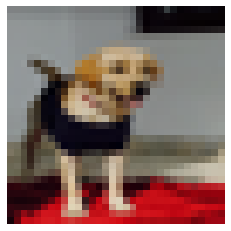

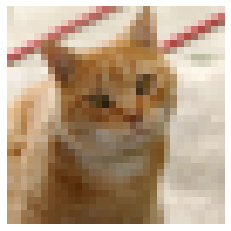

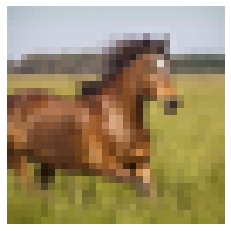

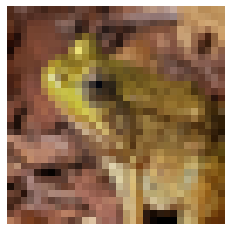

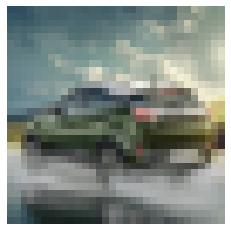

In [32]:
for image in images:
    plt.imshow(image)
    plt.axis('off')
    plt.show()

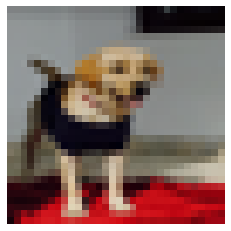

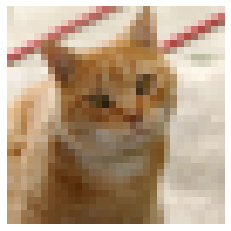

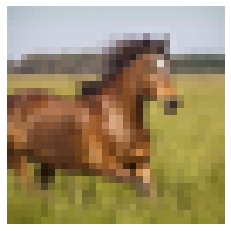

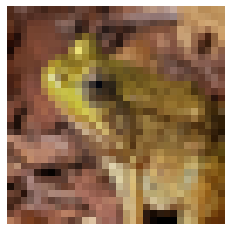

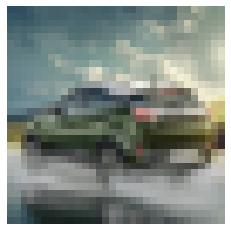

In [33]:
image_rotate_angle = [
    0,
    0,
    0,
    0,
    0,
]
rotated_images = [image.rotate(angle) for image, angle in zip(images, image_rotate_angle)]
input_images = np.array([np.array(image) for image in rotated_images])

for image in input_images:
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [34]:
model_name = "final_model.h5"
model = load_model(MODEL_PATH / model_name)

2022-07-17 20:47:09.060718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


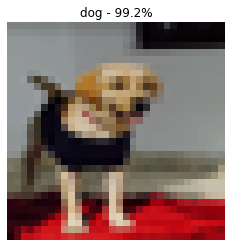

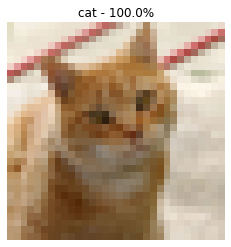

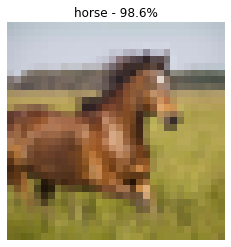

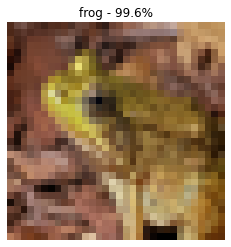

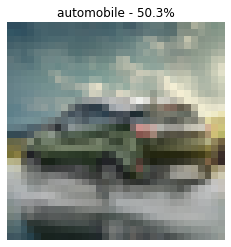

In [35]:
predictions_ohe = model.predict(input_images)
predictions_prob = predictions_ohe.max(axis=1)
predictions = predictions_ohe.argmax(axis=1)

for i, image in enumerate(input_images):
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"{CLASS_NAMES[predictions[i]]} - {100*predictions_prob[i]:.1f}%")
    plt.show()